In [1]:
import torch
from sentence_transformers import SentenceTransformer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

/work/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model = SentenceTransformer("BAAI/bge-m3")

sentences = [
    "Mám tě rád",
    "Miluji tě",
    "Nesnáším tě",
    "123"
]

embeddings = model.encode(sentences)

We detected that you are passing `past_key_values` as a tuple and this is deprecated and will be removed in v4.43. Please use an appropriate `Cache` class (https://huggingface.co/docs/transformers/v4.41.3/en/internal/generation_utils#transformers.Cache)


In [3]:
assert model.similarity(embeddings[0], embeddings[1]) > model.similarity(embeddings[0], embeddings[2])

In [4]:
print(
    "Mám tě rád <-> Miluji tě  ",
    model.similarity(embeddings[0], embeddings[1]),
    "\n"
    "Mám tě rád <-> Nesnáším tě  ",
    model.similarity(embeddings[0], embeddings[2])
)

Mám tě rád <-> Miluji tě   tensor([[0.9821]]) 
Mám tě rád <-> Nesnáším tě   tensor([[0.8851]])


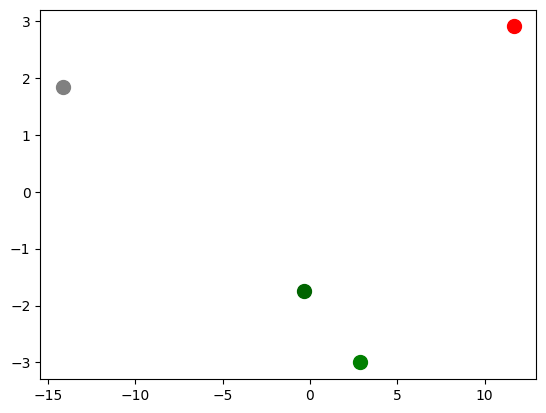

In [5]:
reducer = PCA(n_components=2)
reducer = reducer.fit_transform(embeddings)

plt.plot(reducer[0][0], reducer[0][1], ".", c="green", markersize=20)
plt.plot(reducer[1][0], reducer[1][1], ".", c="darkgreen", markersize=20)
plt.plot(reducer[2][0], reducer[2][1], ".", c="red", markersize=20)
plt.plot(reducer[3][0], reducer[3][1], ".", c="grey", markersize=20)

intfloat/e5-mistral-7b-instruct
```
Mám tě rád <-> Miluji tě   tensor([[0.9405]]) 
Mám tě rád <-> Nesnáším tě   tensor([[0.8059]])
```

<br>

BAAI/bge-m3
```
Mám tě rád <-> Miluji tě   tensor([[0.8549]]) 
Mám tě rád <-> Nesnáším tě   tensor([[0.6700]])
```

<br>

Linq-AI-Research/Linq-Embed-Mistral
```
Mám tě rád <-> Miluji tě   tensor([[0.8490]]) 
Mám tě rád <-> Nesnáším tě   tensor([[0.6811]])
```

<br>

NovaSearch/stella_en_1.5B_v5
```
Mám tě rád <-> Miluji tě   tensor([[0.9821]]) 
Mám tě rád <-> Nesnáším tě   tensor([[0.8851]])
```
